# NumPy
NumPy（Numerical Python的简称）是Python数值计算最重要的基础包。大多数提供科学计算的包都是用NumPy的数组作为构建基础。

NumPy的部分功能如下：
>* ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
* 用于对整组数据进行快速运算的标准数学函数（无需编写循环）。
* 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
* 线性代数、随机数生成以及傅里叶变换功能。
* 用于集成由C、C++、Fortran等语言编写的代码的API。

对于大部分数据分析应用而言，我最关注的功能主要集中在：
>- 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。
- 常用的数组算法，如排序、唯一化、集合运算等。
- 高效的描述统计和数据聚合/摘要运算。
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算。
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）。
- 数据的分组运算（聚合、转换、函数应用等）。

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：
>- NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少。
- NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

# 安装NumPy

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.14.5


# ndarray：一种多维数组对象
NumPy最重要的一个特点就是其N维数组对象（即ndarray），该对象是一个快速而灵活的大数据集容器。你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

In [3]:
xa=np.random.randn(4,2)
xa

array([[-1.10441584, -0.66386808],
       [-0.77856637,  0.19133759],
       [ 0.5694873 , -0.62968091],
       [-1.06322168, -0.1085737 ]])

In [4]:
ya=10
print(ya*10)
print(xa*10)

100
[[-11.04415842  -6.63868079]
 [ -7.78566375   1.91337585]
 [  5.69487295  -6.29680906]
 [-10.63221685  -1.08573696]]


In [5]:
print(xa+xa)

[[-2.20883168 -1.32773616]
 [-1.55713275  0.38267517]
 [ 1.13897459 -1.25936181]
 [-2.12644337 -0.21714739]]


ndarray是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是相同类型的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）<br>
**注意：**当你看到“数组”、“NumPy数组”、"ndarray"时，基本上都指的是同一样东西，即ndarray对象。

In [6]:
xa.shape

(4, 2)

In [7]:
xa.dtype

dtype('float64')

# 创建ndarray
创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。

In [8]:
xa=np.array(range(11))
xa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
type(xa)

numpy.ndarray

In [10]:
xa.shape

(11,)

In [11]:
ya=np.array([range(4) for i in range(11)])
ya

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [12]:
ya.shape

(11, 4)

除np.array之外，还有一些函数也可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数组。要用这些方法创建多维数组，只需传入一个表示形状的元组即可：

In [13]:
xa=np.zeros((10,2))
xa

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
xa=np.ones((3,2))
xa

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [15]:
xa=np.empty((2,2,2))
xa

array([[[-2.20883168, -1.32773616],
        [-1.55713275,  0.38267517]],

       [[ 1.13897459, -1.25936181],
        [-2.12644337, -0.21714739]]])

In [16]:
xa=np.empty

arange是Python内置函数range的数组版

In [17]:
xa=np.arange(1,10,2)
xa

array([1, 3, 5, 7, 9])

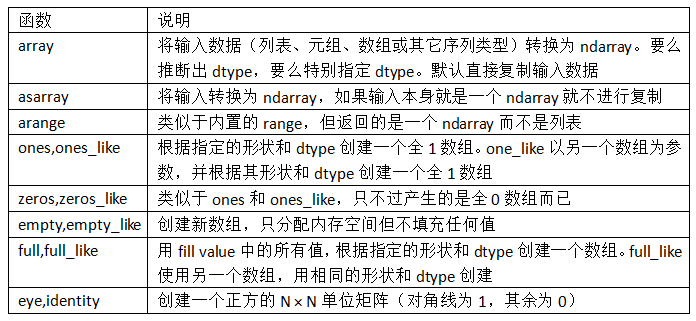

# ndarray的数据类型
* dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息.<br>
* dtype是NumPy灵活交互其它系统的源泉之一。多数情况下，它们直接映射到相应的机器表示，这使得“读写磁盘上的二进制数据流”以及“集成低级语言代码（如C、Fortran）”等工作变得更加简单。数值型dtype的命名方式相同：一个类型名（如float或int），后面跟一个用于表示各元素位长的数字。标准的双精度浮点值（即Python中的float对象）需要占用8字节（即64位）。因此，该类型在NumPy中就记作float64。<br>
* 你可以通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype：

In [18]:
xa.dtype

dtype('int32')

In [19]:
xa=xa.astype(np.float64)
xa

array([1., 3., 5., 7., 9.])

In [20]:
xa.dtype

dtype('float64')

# NumPy数组的运算
数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级。

In [21]:
xa*10

array([10., 30., 50., 70., 90.])

In [22]:
ya=xa>10

In [23]:
ya.dtype

dtype('bool')

# 基本的索引和切片
NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多。

In [24]:
xa=np.arange(11)
xa[1:4]=10
xa

array([ 0, 10, 10, 10,  4,  5,  6,  7,  8,  9, 10])

In [25]:
ya=list(range(11))
ya[1:4]=range(3)
ya

[0, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10]

对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [26]:
xa=np.random.randn(4,2)
xa[0]

array([ 0.49945454, -1.41737348])

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的

In [27]:
xa[0][0]

0.49945453774666926

In [28]:
xa[0,0]

0.49945453774666926

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。

In [29]:
xa=np.random.randn(5,4,3,2)
xa

array([[[[-0.58131055, -0.5482518 ],
         [-0.42282817,  1.30255537],
         [ 0.01044808,  0.52696568]],

        [[-0.33608096,  0.7636294 ],
         [ 0.47559131,  1.35809401],
         [-0.57145634,  0.93807148]],

        [[ 0.32084632, -1.08257905],
         [-1.12843615,  1.8819819 ],
         [ 1.87751825, -0.74719418]],

        [[-0.47715   , -2.36689265],
         [-0.41370677,  0.72118225],
         [-1.72010278, -0.68262295]]],


       [[[ 1.4240795 , -0.93165543],
         [ 0.31588385,  1.37549531],
         [-0.03029137,  0.40485096]],

        [[ 0.01819624,  0.24772237],
         [-0.10199546,  0.01190727],
         [-0.74880272,  1.10393437]],

        [[ 1.68924414, -0.04042841],
         [-0.92273414, -0.25504878],
         [ 0.36691162,  0.33376167]],

        [[-0.54093045,  0.03607774],
         [ 0.93751377,  0.51785213],
         [ 0.97237023,  0.28846829]]],


       [[[-0.63633832, -0.8632898 ],
         [-0.0603453 , -1.48383831],
         [ 0.75564

In [30]:
xa[0,0]

array([[-0.58131055, -0.5482518 ],
       [-0.42282817,  1.30255537],
       [ 0.01044808,  0.52696568]])

In [31]:
xa[0,0,0]

array([-0.58131055, -0.5482518 ])

In [32]:
xa[0,0,0,0]

-0.5813105501705154

# 切片索引

In [33]:
# 以为数组的切片语法
xa=np.arange(11)
xa[1:3]

array([1, 2])

In [34]:
# 多维数组的切片语法
xa=np.random.randn(4,2)
xa[:2]

array([[-1.99268444,  1.39706039],
       [ 0.09530089,  0.25604118]])

In [35]:
xa

array([[-1.99268444,  1.39706039],
       [ 0.09530089,  0.25604118],
       [-0.81932395,  1.47738205],
       [-0.10177301,  2.2063418 ]])

In [36]:
xa[1,:]

array([0.09530089, 0.25604118])

# 布尔型索引

In [37]:
xa=np.random.randn(10,4)
xa

array([[ 3.33134877e-01,  7.31285088e-01,  2.75615866e+00,
        -1.70735334e+00],
       [ 2.09468083e+00, -5.77588191e-01,  9.07268139e-01,
        -1.54208389e+00],
       [-5.58313942e-03,  1.38039342e+00, -1.13764796e+00,
        -1.48250720e-01],
       [ 4.21514597e-01,  2.36827365e-03,  8.28169549e-01,
         3.90592987e-01],
       [-4.11170554e-01,  5.47285978e-01,  5.93043033e-02,
         2.89160692e-01],
       [-5.96621739e-01,  1.08332626e+00, -9.10739284e-02,
         2.78213910e-02],
       [-6.95478337e-01,  2.67760071e-01, -2.63376753e-03,
        -3.02688833e-01],
       [ 5.21947760e-01,  9.61701197e-01,  9.90026829e-01,
         6.17793804e-01],
       [-5.66650191e-01, -1.36539116e+00,  3.31634826e-02,
        -7.70201850e-01],
       [-8.72933677e-01, -1.31216457e+00, -1.22293832e+00,
        -1.37284385e+00]])

In [38]:
ya=xa>0
ya

array([[ True,  True,  True, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True, False,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [False, False,  True, False],
       [False, False, False, False]])

In [39]:
xa[ya]

array([3.33134877e-01, 7.31285088e-01, 2.75615866e+00, 2.09468083e+00,
       9.07268139e-01, 1.38039342e+00, 4.21514597e-01, 2.36827365e-03,
       8.28169549e-01, 3.90592987e-01, 5.47285978e-01, 5.93043033e-02,
       2.89160692e-01, 1.08332626e+00, 2.78213910e-02, 2.67760071e-01,
       5.21947760e-01, 9.61701197e-01, 9.90026829e-01, 6.17793804e-01,
       3.31634826e-02])

In [40]:
xa[xa[:,0]>0,:]

array([[ 3.33134877e-01,  7.31285088e-01,  2.75615866e+00,
        -1.70735334e+00],
       [ 2.09468083e+00, -5.77588191e-01,  9.07268139e-01,
        -1.54208389e+00],
       [ 4.21514597e-01,  2.36827365e-03,  8.28169549e-01,
         3.90592987e-01],
       [ 5.21947760e-01,  9.61701197e-01,  9.90026829e-01,
         6.17793804e-01]])

In [41]:
ya=xa[:,0]>0
ya

array([ True,  True, False,  True, False, False, False,  True, False,
       False])

In [42]:
xa[ya,:]

array([[ 3.33134877e-01,  7.31285088e-01,  2.75615866e+00,
        -1.70735334e+00],
       [ 2.09468083e+00, -5.77588191e-01,  9.07268139e-01,
        -1.54208389e+00],
       [ 4.21514597e-01,  2.36827365e-03,  8.28169549e-01,
         3.90592987e-01],
       [ 5.21947760e-01,  9.61701197e-01,  9.90026829e-01,
         6.17793804e-01]])

In [43]:
ya=xa[:,0]>0
xa[~ya,:]

array([[-0.00558314,  1.38039342, -1.13764796, -0.14825072],
       [-0.41117055,  0.54728598,  0.0593043 ,  0.28916069],
       [-0.59662174,  1.08332626, -0.09107393,  0.02782139],
       [-0.69547834,  0.26776007, -0.00263377, -0.30268883],
       [-0.56665019, -1.36539116,  0.03316348, -0.77020185],
       [-0.87293368, -1.31216457, -1.22293832, -1.37284385]])

通过布尔型数组设置值是一种经常用到的手段。

In [44]:
xa[~ya,:]=0
xa

array([[ 3.33134877e-01,  7.31285088e-01,  2.75615866e+00,
        -1.70735334e+00],
       [ 2.09468083e+00, -5.77588191e-01,  9.07268139e-01,
        -1.54208389e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.21514597e-01,  2.36827365e-03,  8.28169549e-01,
         3.90592987e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.21947760e-01,  9.61701197e-01,  9.90026829e-01,
         6.17793804e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

# 花式索引
花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。

In [45]:
xa=np.random.randn(10,4)
xa

array([[ 1.26379974, -1.3845547 , -0.03810295,  0.32919752],
       [-1.24495452, -0.7517931 , -1.37303694,  0.20996291],
       [-0.90900487,  0.3402037 ,  0.75857965,  0.49450954],
       [ 2.19352342, -0.88536078,  1.75504708, -0.85393008],
       [-1.0408966 , -0.02489196,  1.74688941, -0.1442133 ],
       [-1.25162365, -0.44984071, -0.55593766,  0.00573748],
       [ 1.06915446,  0.29082754, -0.58476058,  0.35899594],
       [-0.77100515,  2.01798884, -1.62171433,  0.0599434 ],
       [-0.70591273,  0.47032382, -0.46697498, -0.78249258],
       [ 0.76384724,  0.61175287, -0.24101441, -0.038358  ]])

In [46]:
xa[[-1,1,0,2],:]

array([[ 0.76384724,  0.61175287, -0.24101441, -0.038358  ],
       [-1.24495452, -0.7517931 , -1.37303694,  0.20996291],
       [ 1.26379974, -1.3845547 , -0.03810295,  0.32919752],
       [-0.90900487,  0.3402037 ,  0.75857965,  0.49450954]])

In [47]:
xa[[-1,1,0],[3,2,1]]

array([-0.038358  , -1.37303694, -1.3845547 ])

In [48]:
xa[[-1,1,0,2]][:,[3,2,1,0]]

array([[-0.038358  , -0.24101441,  0.61175287,  0.76384724],
       [ 0.20996291, -1.37303694, -0.7517931 , -1.24495452],
       [ 0.32919752, -0.03810295, -1.3845547 ,  1.26379974],
       [ 0.49450954,  0.75857965,  0.3402037 , -0.90900487]])

# 数组转置和轴对换
转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。

In [49]:
xa=np.random.randn(5,3)

In [50]:
xa

array([[ 1.20692214,  0.77278089, -0.3438843 ],
       [ 0.59396653, -2.25103342, -0.68663526],
       [-1.49225161,  0.84687782, -1.02309045],
       [ 1.81234657, -1.09318855,  0.3719223 ],
       [-0.10683908, -1.4699756 , -0.31640976]])

In [51]:
xa.T

array([[ 1.20692214,  0.59396653, -1.49225161,  1.81234657, -0.10683908],
       [ 0.77278089, -2.25103342,  0.84687782, -1.09318855, -1.4699756 ],
       [-0.3438843 , -0.68663526, -1.02309045,  0.3719223 , -0.31640976]])

In [52]:
np.dot(xa,xa.T)

array([[ 2.17210777, -0.78656116, -0.79475577,  1.21466774, -1.15610714],
       [-0.78656116,  5.89141569, -2.09020781,  3.2819022 ,  3.46276346],
       [-0.79475577, -2.09020781,  3.99073098, -4.01078437, -0.76174313],
       [ 1.21466774,  3.2819022 , -4.01078437,  4.61798749,  1.29565121],
       [-1.15610714,  3.46276346, -0.76174313,  1.29565121,  2.27235798]])

# 通用函数：快速的元素级数组函数
* 通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。
* 许多ufunc都是简单的元素级变体，如sqrt和exp：

In [53]:
xa=np.random.randn(4,3)
xa

array([[-0.92209287,  1.4371084 , -0.52922639],
       [-0.22905168, -1.78509987,  0.72559387],
       [-0.7638676 ,  2.35719304, -0.02124751],
       [ 0.11986545,  1.58159567, -0.79452732]])

In [54]:
np.sqrt(np.abs(xa))

array([[0.96025667, 1.19879456, 0.72747948],
       [0.47859344, 1.33607629, 0.85181798],
       [0.8739952 , 1.53531529, 0.14576526],
       [0.3462159 , 1.25761507, 0.89136262]])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组

In [55]:
xa

array([[-0.92209287,  1.4371084 , -0.52922639],
       [-0.22905168, -1.78509987,  0.72559387],
       [-0.7638676 ,  2.35719304, -0.02124751],
       [ 0.11986545,  1.58159567, -0.79452732]])

In [56]:
np.add(xa,xa)

array([[-1.84418574,  2.87421679, -1.05845277],
       [-0.45810336, -3.57019973,  1.45118774],
       [-1.5277352 ,  4.71438608, -0.04249502],
       [ 0.2397309 ,  3.16319133, -1.58905463]])

# 一元ufunc
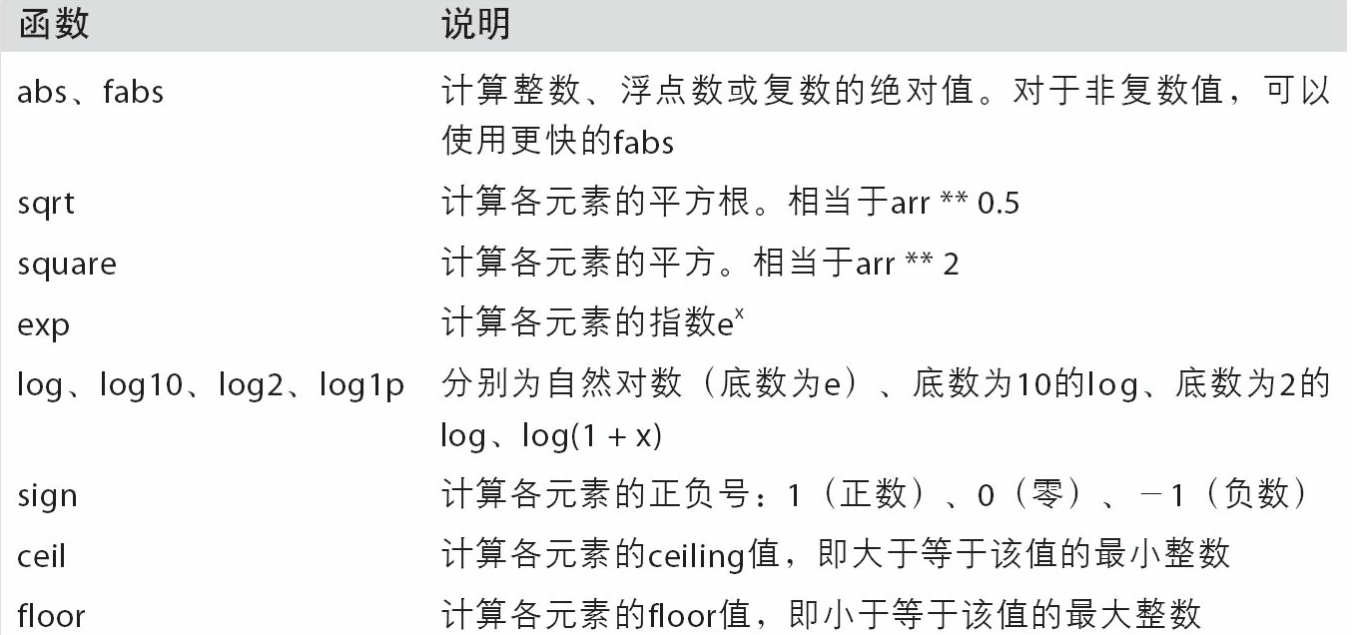

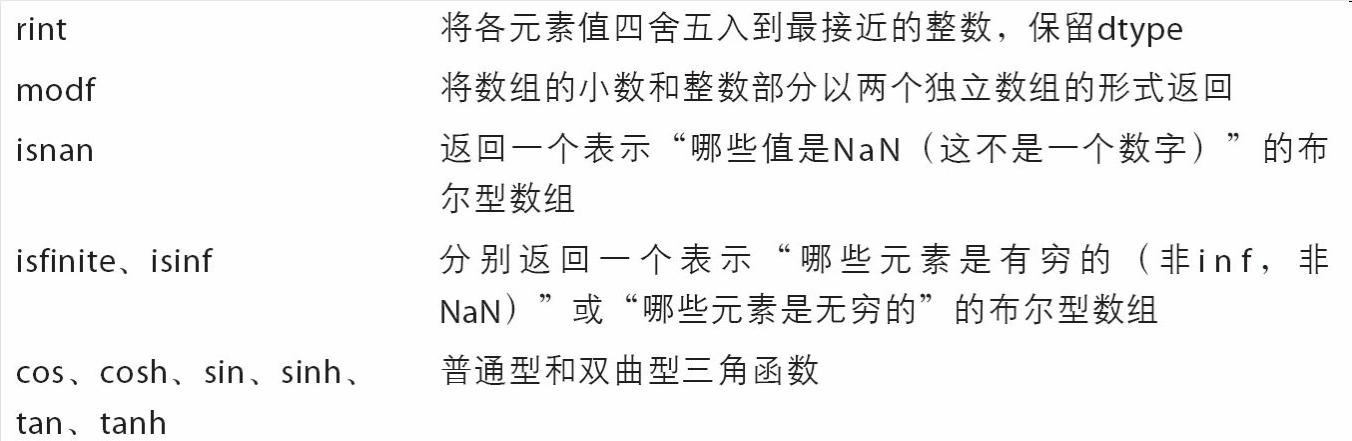

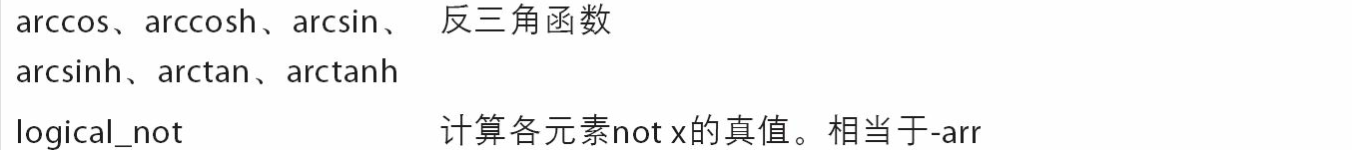

# 二元ufunc
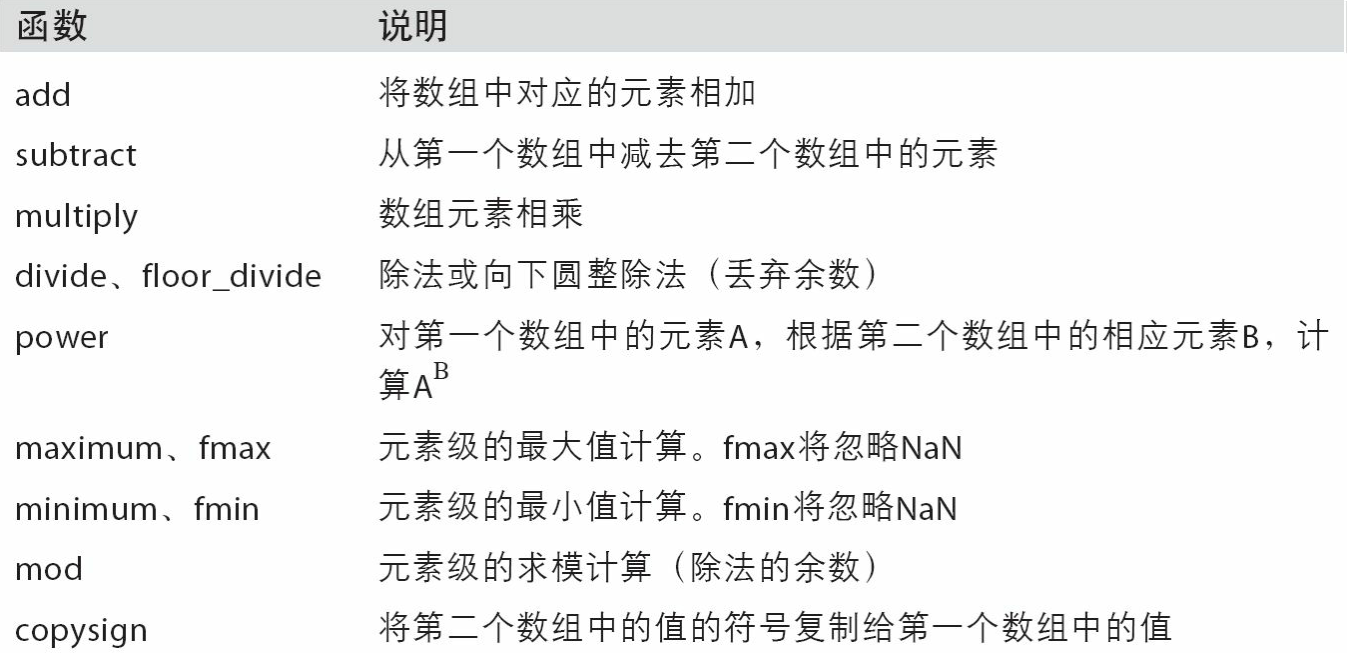

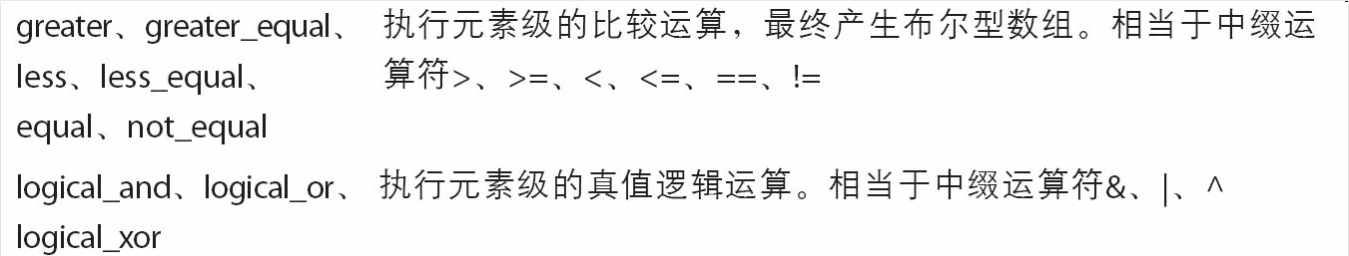

# 利用数组进行数据处理
NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

In [57]:
xa=np.random.randn(10)# 股票的买入价格
xb=np.random.randn(10)# 相应股票的买入数量
xa*xb

array([ 1.66756447,  0.0312281 ,  0.92026096,  1.93842886,  1.37723792,
       -0.01141816,  0.13720323,  2.78258269,  0.87571761, -0.16550517])

In [58]:
np.sum(xa*xb)

9.55330051301356

# 将条件逻辑表述为数组运算
numpy.where函数是三元表达式x if condition else y的矢量化版本。

In [59]:
xa=np.random.randn(5,3)
xb=np.zeros((5,3))
np.where(xa>0,xa,xb)

array([[2.01235874, 0.        , 0.        ],
       [0.        , 0.        , 0.05052796],
       [0.62076229, 1.15920764, 1.94197153],
       [0.        , 1.12560679, 0.24407639],
       [0.        , 0.        , 0.        ]])

In [60]:
xa

array([[ 2.01235874, -0.30994887, -0.91457834],
       [-0.75561015, -1.1867526 ,  0.05052796],
       [ 0.62076229,  1.15920764,  1.94197153],
       [-1.17183596,  1.12560679,  0.24407639],
       [-0.85405427, -1.61617526, -0.46596571]])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。

In [61]:
np.where(xa>0,1,0)

array([[1, 0, 0],
       [0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 0]])

# 数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [62]:
xa=np.random.randn(5,4)
xa

array([[-0.44229528, -0.49070128, -1.97007529,  0.81742616],
       [ 0.29307112,  0.95043694,  1.53082834, -0.03314137],
       [ 1.489386  ,  0.34182613, -1.27485809, -0.15457872],
       [ 2.25779752,  0.74649359, -0.12967651, -0.60962743],
       [-0.31532075,  1.3983356 ,  0.2770075 , -0.60760958]])

In [63]:
xa.mean()

0.20373622984770975

In [64]:
xa.sum()

4.074724596954195

In [65]:
np.mean(xa)

0.20373622984770975

In [66]:
np.sum(xa)

4.074724596954195

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [67]:
xa=np.random.randn(4,3,2)
xa

array([[[ 0.07047038, -0.2335882 ],
        [-0.58245061, -0.72451951],
        [-0.02694388,  0.19594958]],

       [[-0.25690307, -0.20232446],
        [ 0.30455715,  0.31971885],
        [ 0.74210007, -0.46296721]],

       [[ 0.38947049,  0.36991293],
        [ 0.9563258 , -0.36822159],
        [-1.79794094, -0.11897337]],

       [[ 0.61515747,  0.70762016],
        [ 0.17966807,  0.87967808],
        [-0.29398237,  0.32202424]]])

In [68]:
xa.sum(2)

array([[-0.16311782, -1.30697013,  0.1690057 ],
       [-0.45922753,  0.624276  ,  0.27913286],
       [ 0.75938342,  0.58810421, -1.91691431],
       [ 1.32277763,  1.05934615,  0.02804187]])

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组

In [69]:
xa=np.arange(9)

In [70]:
xa=xa.reshape(3,3)
xa

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [71]:
xa.cumsum(1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

# 基本数组统计方法
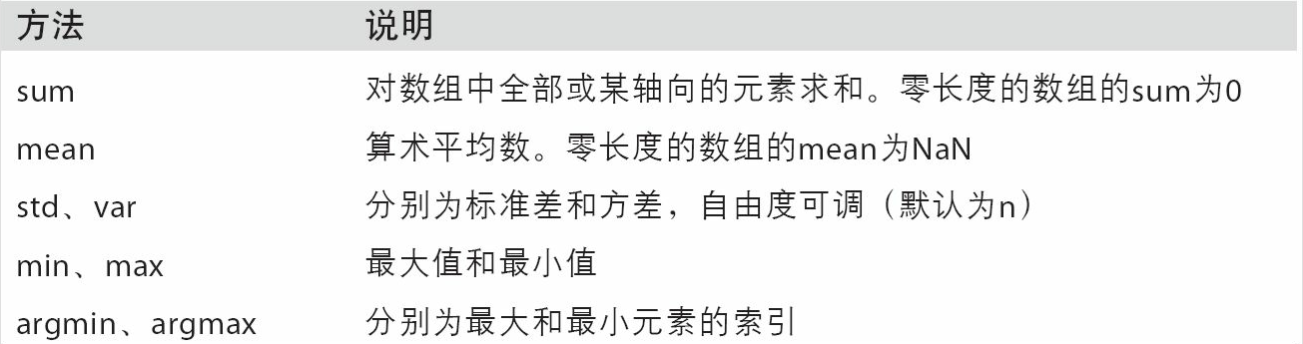

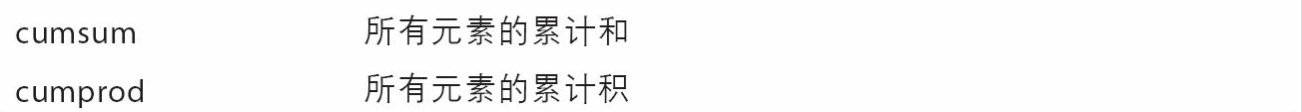

# 用于布尔型数组的方法
在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [72]:
xa=np.random.randn(5,4)
xa

array([[ 0.24266087, -0.48323676,  1.11658371,  0.80754309],
       [ 0.01697608, -1.55018842, -0.18009985, -2.26343254],
       [ 0.29434815, -0.17111134, -1.28385946,  1.58409555],
       [ 0.93964168,  0.5705046 ,  0.47054652, -0.00470194],
       [ 0.63243692,  1.61504217,  0.62880961, -1.04826951]])

In [73]:
(xa>0).sum()

12

另外还有两个方法any和all，它们对布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True：

In [74]:
(xa>0).any()

True

In [75]:
(np.abs(xa)>0).all()

True

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

# 排序
跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地排序：

In [76]:
xa=np.random.randn(10)
xa

array([-1.053639  , -0.68857253, -1.11654842, -1.35028188,  1.26200211,
       -0.20485688,  0.29682634,  0.01185628,  1.2975283 ,  1.00013115])

In [77]:
xa.sort()
xa

array([-1.35028188, -1.11654842, -1.053639  , -0.68857253, -0.20485688,
        0.01185628,  0.29682634,  1.00013115,  1.26200211,  1.2975283 ])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：

In [78]:
xa=np.random.randn(5,3)
xa.sort(0)
xa

array([[-1.12872259, -1.27958964, -1.7637176 ],
       [-0.63239476, -1.19613239, -1.66140843],
       [-0.53737813, -0.53020745, -1.41532822],
       [ 0.74424827,  0.11091932, -1.03058115],
       [ 1.10824012,  1.09941041, -0.58505235]])

# 唯一化以及其它的集合逻辑
NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值。

In [79]:
xa=np.random.randn(20).astype(np.int)
xa

array([ 0,  0,  0,  1,  0,  1,  1,  0, -1,  0,  0,  0, -1,  0,  2,  0,  0,
        1,  1,  0])

In [80]:
np.unique(xa)

array([-1,  0,  1,  2])

In [81]:
set(xa.tolist())

{-1, 0, 1, 2}

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

In [82]:
np.in1d(np.arange(9),[2,3,5])

array([False, False,  True,  True, False,  True, False, False, False])

In [83]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

# 数组的集合运算
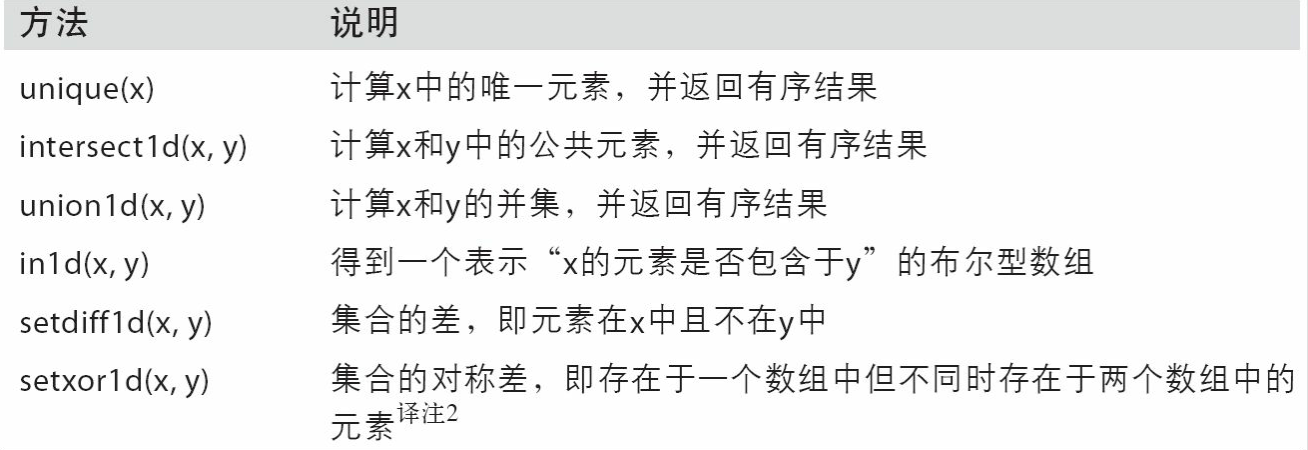

# 线性代数
线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。<br>

In [84]:
xa=np.random.randn(3,3)
xa

array([[-1.414702  , -1.64535926, -0.44971671],
       [-0.53762202,  1.32501311,  1.2471132 ],
       [ 1.12682528, -1.05876953,  1.10959108]])

In [85]:
np.diag(xa)

array([-1.414702  ,  1.32501311,  1.10959108])

In [86]:
np.diag(np.arange(4))

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [87]:
xa=np.random.randn(4,3)
xa

array([[ 1.0347716 ,  1.95085211,  0.01962587],
       [-0.04883733, -0.72554172,  0.3115533 ],
       [-0.36013647, -0.40166851,  0.60777199],
       [-0.72375682, -0.08055365,  1.16312178]])

In [88]:
xa.T.dot(xa)

array([[ 1.72665956,  2.2570766 , -1.05560532],
       [ 2.2570766 ,  4.50006123, -0.52557432],
       [-1.05560532, -0.52557432,  1.81968971]])

In [89]:
np.trace(xa)

0.9170018665914909

最常用的线性代数函数:<br>
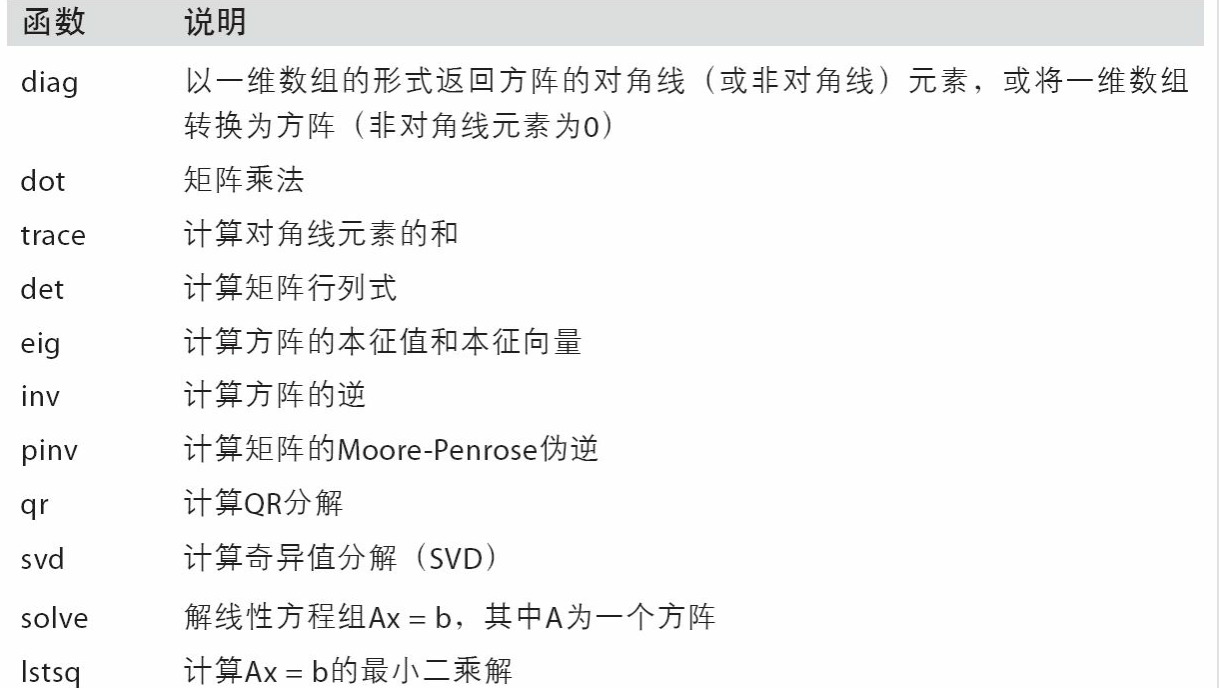

# 伪随机数生成
numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。<br>
而Python内置的random模块则只能一次生成一个样本值。<br>
我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子

# numpy.random的函数
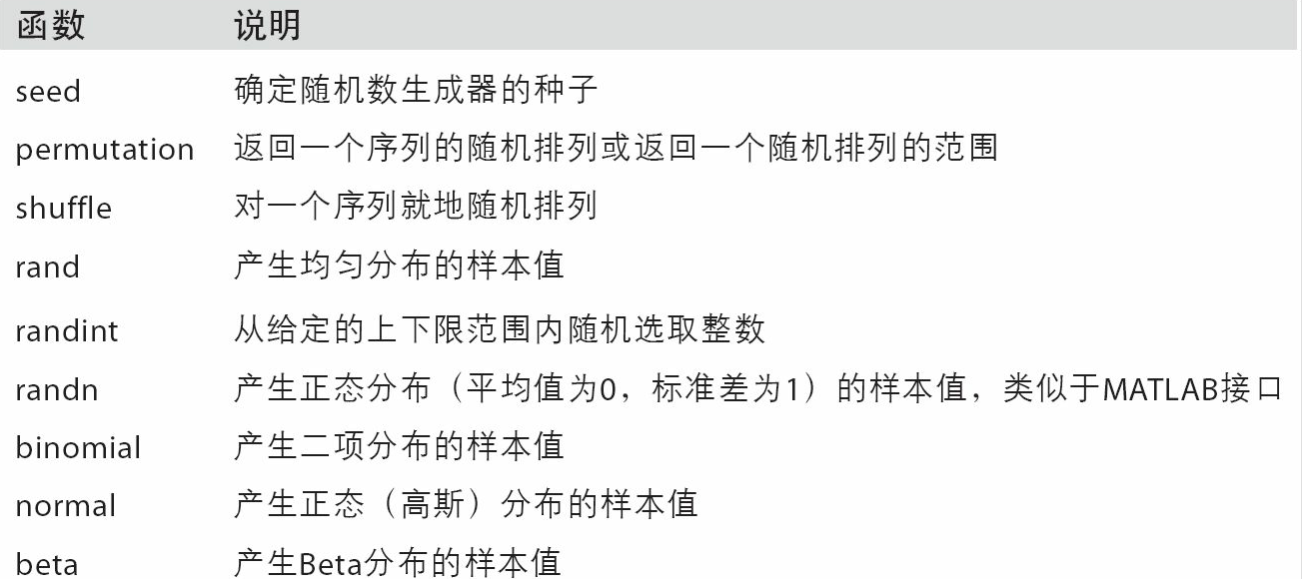

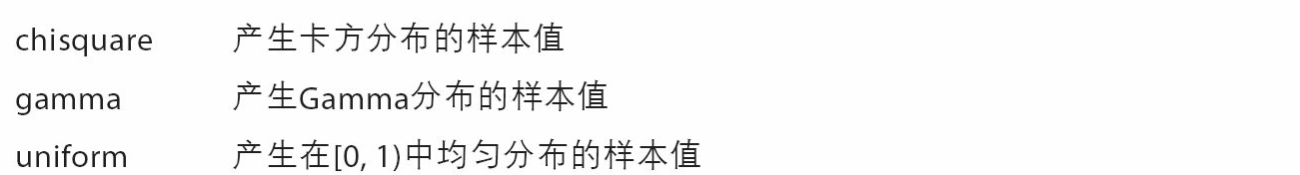

# NumPy – MatLab 的替代之一:
>- NumPy 通常与 SciPy（Scientific Python）和 Matplotlib（绘图库）一起使用。 这种组合广泛用于替代 MatLab，是一个流行的技术计算平台。 但是，Python 作为 MatLab 的替代方案，现在被视为一种更加现代和完整的编程语言。
- NumPy 是开源的，这是它的一个额外的优势。